In [ ]:
!pip install keras_preprocessing

In [11]:
#Importing packages
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt 
import warnings
import tensorflow as tf
from pylab import mpl, plt
warnings.filterwarnings('ignore')
import seaborn as sns
from keras.utils import to_categorical
from keras_preprocessing import image
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization

In [2]:
#Retrieving the training data and test data
directory = 'C://Shruti Image Processing/Original Images/'
generator=ImageDataGenerator()
train_data = generator.flow_from_directory(directory,target_size=(224, 224),batch_size=32)
classes = list(train_data.class_indices.keys())

Found 495 images belonging to 15 classes.


In [17]:
#CNN model definition
face_dtction_mdl = Sequential()
face_dtction_mdl.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
face_dtction_mdl.add(MaxPooling2D(pool_size=(2,2)))
face_dtction_mdl.add(BatchNormalization())
face_dtction_mdl.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
face_dtction_mdl.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
face_dtction_mdl.add(MaxPooling2D(pool_size=(2,2)))
face_dtction_mdl.add(BatchNormalization())
face_dtction_mdl.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
face_dtction_mdl.add(MaxPooling2D(pool_size=(2,2)))
face_dtction_mdl.add(BatchNormalization())
face_dtction_mdl.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
face_dtction_mdl.add(MaxPooling2D(pool_size=(2,2)))
face_dtction_mdl.add(BatchNormalization())
face_dtction_mdl.add(Flatten())
face_dtction_mdl.add(Dropout(0.40))
face_dtction_mdl.add(Dense(128, activation='softmax'))
face_dtction_mdl.add(Dense(len(classes),activation='relu'))

In [18]:
#Model compilation step
opt = tf.keras.optimizers.Adam()
metrics = ['accuracy']
face_dtction_mdl.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=metrics)


In [19]:
#Model summary
face_dtction_mdl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 64)      

In [20]:
# Train the Model
history = face_dtction_mdl.fit(train_data,
                     epochs=10)

Epoch 1/10
16/16 [==============================] - 42s 3s/step - loss: 0.4950 - accuracy: 0.0828
Epoch 2/10
16/16 [==============================] - 43s 3s/step - loss: 0.3668 - accuracy: 0.1394
Epoch 3/10
16/16 [==============================] - 43s 3s/step - loss: 0.3198 - accuracy: 0.1919
Epoch 4/10
16/16 [==============================] - 43s 3s/step - loss: 0.2929 - accuracy: 0.2000
Epoch 5/10
16/16 [==============================] - 43s 3s/step - loss: 0.2465 - accuracy: 0.2566
Epoch 6/10
16/16 [==============================] - 44s 3s/step - loss: 0.2407 - accuracy: 0.3071
Epoch 7/10
16/16 [==============================] - 45s 3s/step - loss: 0.2270 - accuracy: 0.3475
Epoch 8/10
16/16 [==============================] - 45s 3s/step - loss: 0.2161 - accuracy: 0.4242
Epoch 9/10
16/16 [==============================] - 43s 3s/step - loss: 0.1949 - accuracy: 0.4545
Epoch 10/10
16/16 [==============================] - 43s 3s/step - loss: 0.1906 - accuracy: 0.4687


Text(0.5, 0, 'Count of Epoches')

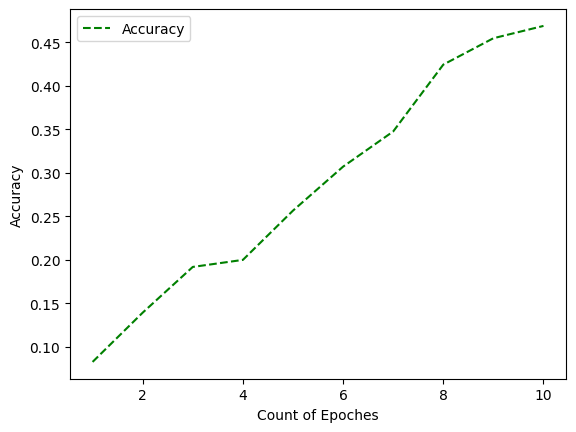

In [21]:
#Visualising the accuracy of the model
accuracy = history.history['accuracy']
train_loss = history.history['loss']
epoch_count = range(1, len(train_loss) + 1)
plt.plot(epoch_count, accuracy, 'g--')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.xlabel('Count of Epoches')

Text(0.5, 0, 'Count of Epoches')

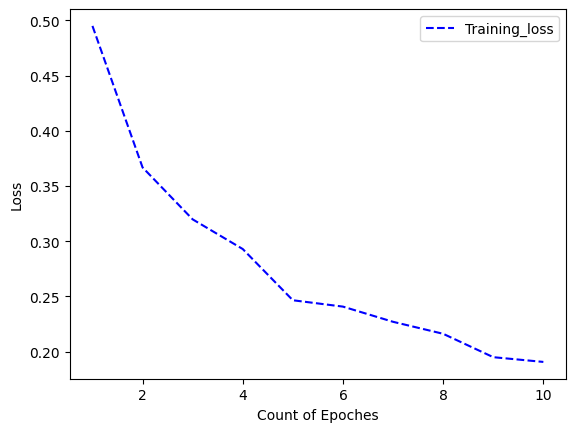

In [22]:
#Visualising the loss of the model
train_loss = history.history['loss']
epoch_count = range(1, len(train_loss) + 1)
plt.plot(epoch_count, train_loss, 'b--')
plt.ylabel('Loss')
plt.legend(['Training_loss'])
plt.xlabel('Count of Epoches')

In [30]:
def image_prdction(path):
    imge = image.load_img(path, target_size=(224,224,3))
    plt.imshow(imge)
    plt.show()
    a = image.img_to_array(imge)
    a = np.expand_dims(a, axis=0)
    imgs = np.vstack([a])
    predction = face_dtction_mdl.predict(imgs, batch_size=32)
    print("Actual Image: "+(path.split("/")[-1]).split("_")[0])
    print("Predicted Image: "+classes[np.argmax(predction)])

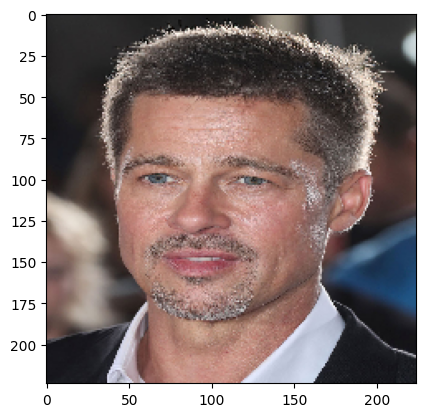

1/1 [==============================] - 0s 31ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [31]:
predict_image("C:/Shruti Image Processing/Original Images/Brad Pitt/Brad Pitt_26.jpg")

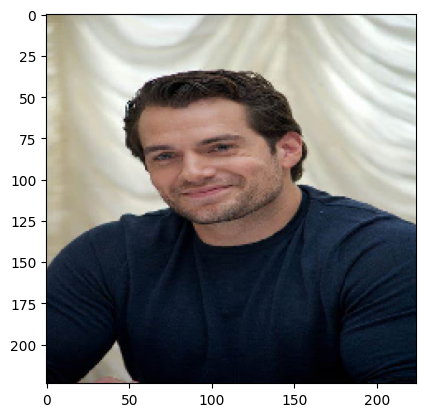

1/1 [==============================] - 0s 43ms/step
Actual: Henry Cavill
Predicted: Henry Cavill


In [32]:
predict_image("C:/Shruti Image Processing/Original Images/Henry Cavill/Henry Cavill_28.jpg")